In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, tree, model_selection, metrics, datasets, base
from joblib import dump, load
import warnings

In [2]:
warnings.filterwarnings("ignore")

### Loading, Analyzing and Visualizing the Dataset

In [3]:
path = "Transformed Data Set - Sheet1.csv"

df = pd.read_csv(path)
print(df.shape)

(66, 5)


In [4]:
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [5]:
df.tail()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M
65,Cool,Electronic,Beer,Coca Cola/Pepsi,M


In [6]:
df.dtypes

Favorite Color          object
Favorite Music Genre    object
Favorite Beverage       object
Favorite Soft Drink     object
Gender                  object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [8]:
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


### Data Preprocessing

In [9]:
target = "Gender"

In [10]:
# Checking for NA values

df.isna().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [11]:
# Checking for duplicated data

df.duplicated().sum()

4

In [12]:
# Dropping duplicated data

df.drop_duplicates(inplace = True)

In [13]:
print(df.shape)

df.duplicated().sum()

(62, 5)


0

Favorite Color
Cool       33
Warm       22
Neutral     7
Name: count, dtype: int64



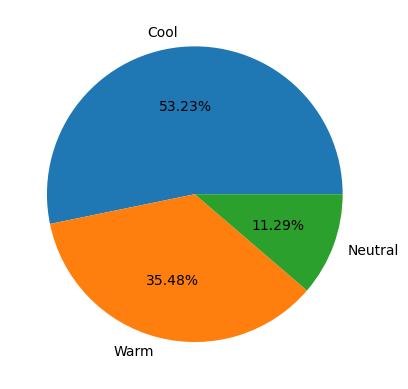

Favorite Music Genre
Pop                 17
Rock                16
Electronic           8
Hip hop              7
R&B and soul         6
Folk/Traditional     4
Jazz/Blues           4
Name: count, dtype: int64



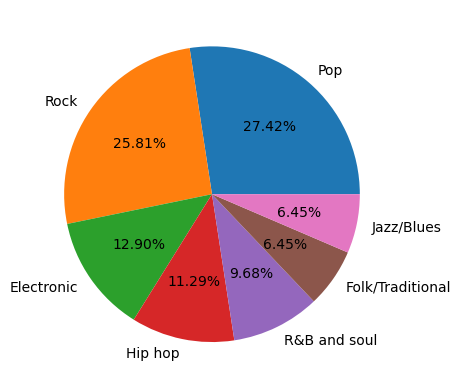

Favorite Beverage
Doesn't drink    14
Beer             12
Wine             10
Other            10
Whiskey           9
Vodka             7
Name: count, dtype: int64



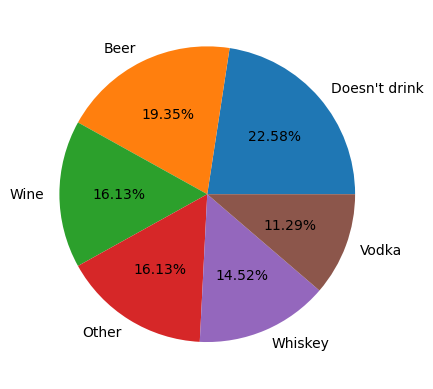

Favorite Soft Drink
Coca Cola/Pepsi    28
Fanta              14
7UP/Sprite         13
Other               7
Name: count, dtype: int64



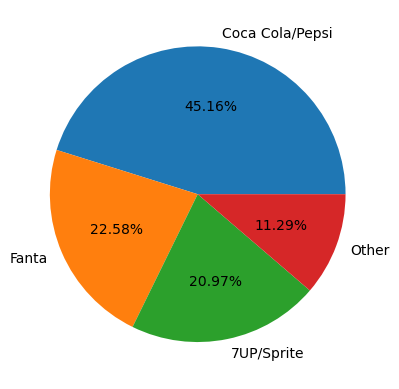

Gender
F    31
M    31
Name: count, dtype: int64



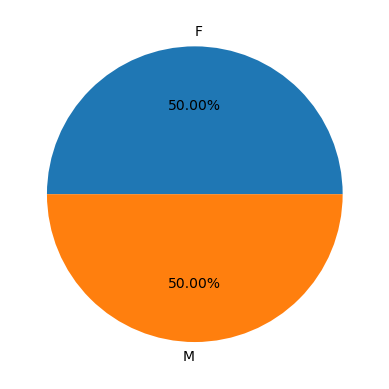

In [14]:
# Count of each category in each of the columns

for col in df.columns:
    val_counts = df[col].value_counts()
    print(val_counts, end = "\n\n")
    plt.pie(val_counts, autopct = "%.2f%%", labels = val_counts.index)
    plt.show()

In [15]:
df[target] = df[target].apply(lambda x : x == "M").astype(int)

In [16]:
cat_cols = df.select_dtypes(include = object).columns.values
cat_cols

array(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink'], dtype=object)

In [17]:
# Encoding categorical data ( One Hot Encoding )

dummies = pd.get_dummies(df.drop(target, axis = 1), drop_first = True)

df = pd.concat([dummies, df.drop(cat_cols, axis = 1)], axis = 1).astype(int)

In [18]:
df.head()

,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other,Gender
0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


In [19]:
X, y = df.drop(target, axis = 1).values, df[target].values

print(X.shape, y.shape)

(62, 16) (62,)


In [20]:
# Splitting the data into training and testing datasets ( stratified splitting )

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 36)

print(X_train.shape, X_test.shape)

(46, 16) (16, 16)


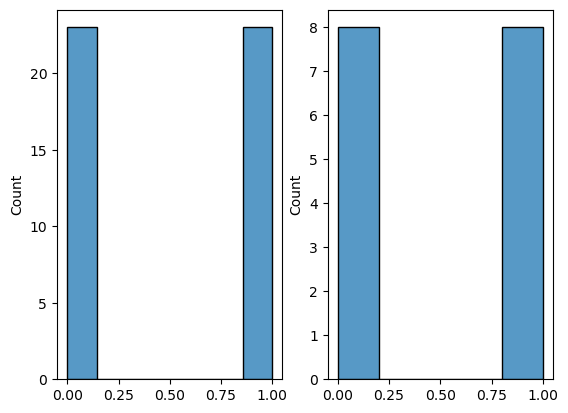

In [21]:
# Checking whether distribution of class labels is uniform across train and test datasets

plt.subplot(1, 2, 1)
sns.histplot(y_train)

plt.subplot(1, 2, 2)
sns.histplot(y_test)

plt.show()

### Model Building and Training

In [22]:
model = tree.DecisionTreeClassifier()

model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

### Overfitting

1.0
0.375


In [23]:
# Cross Validation ( Stratified KFold )

avg = lambda x : sum(x) / len(x)

cross_val_scores = model_selection.cross_val_score(base.clone(model), X, y, cv = 5)
print(cross_val_scores, avg(cross_val_scores))

[0.46153846 0.69230769 0.58333333 0.33333333 0.66666667] 0.5474358974358975


In [24]:
# Tuning hyperparameters

param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [*np.arange(1, 6), None],
    "min_samples_split": np.arange(1, 6),
    "min_samples_leaf": np.arange(1, 6),
    "max_features": [None, *np.arange(1, 6)]
}

grid_model = model_selection.GridSearchCV(base.clone(model), param_grid, cv = 5)

In [25]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, None],
                         'max_features': [None, 1, 2, 3, 4, 5],
                         'min_samples_leaf': array([1, 2, 3, 4, 5]),
                         'min_samples_split': array([1, 2, 3, 4, 5])})

In [26]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0004,0.00049,0.0000,0.00000,gini,1,None,1,1,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2161
1,0.0002,0.00040,0.0000,0.00000,gini,1,None,1,2,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.5,0.555556,0.555556,0.444444,0.666667,0.544444,0.073703,273
2,0.0006,0.00049,0.0004,0.00049,gini,1,None,1,3,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.5,0.555556,0.555556,0.444444,0.666667,0.544444,0.073703,273
3,0.0000,0.00000,0.0000,0.00000,gini,1,None,1,4,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.5,0.555556,0.555556,0.444444,0.666667,0.544444,0.073703,273
4,0.0004,0.00049,0.0002,0.00040,gini,1,None,1,5,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.5,0.555556,0.555556,0.444444,0.666667,0.544444,0.073703,273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,0.0000,0.00000,0.0000,0.00000,log_loss,None,5,5,1,"{'criterion': 'log_loss', 'max_depth': None, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2161
2696,0.0004,0.00049,0.0002,0.00040,log_loss,None,5,5,2,"{'criterion': 'log_loss', 'max_depth': None, '...",0.5,0.444444,0.333333,0.444444,0.555556,0.455556,0.073703,1463
2697,0.0002,0.00040,0.0004,0.00049,log_loss,None,5,5,3,"{'criterion': 'log_loss', 'max_depth': None, '...",0.6,0.555556,0.333333,0.444444,0.222222,0.431111,0.139558,1801
2698,0.0002,0.00040,0.0006,0.00049,log_loss,None,5,5,4,"{'criterion': 'log_loss', 'max_depth': None, '...",0.4,0.555556,0.333333,0.444444,0.555556,0.457778,0.087319,1420


In [27]:
model = grid_model.best_estimator_

In [291]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=2, min_samples_leaf=2,
                       min_samples_split=3)

In [292]:
y_train_pred = model.predict(X_train)

print(model.score(X_train, y_train))

0.6739130434782609


### Model Evaluation

In [293]:
y_test_pred = model.predict(X_test)

print(model.score(X_test, y_test))

0.6875


In [294]:
# Classification Report

clf_report = metrics.classification_report(y_test, y_test_pred)

print(clf_report)

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.64      0.88      0.74         8

    accuracy                           0.69        16
   macro avg       0.72      0.69      0.68        16
weighted avg       0.72      0.69      0.68        16



In [295]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
conf_matrix

array([[4, 4],
       [1, 7]])

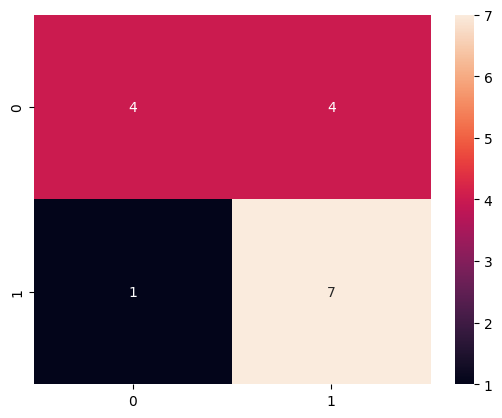

In [296]:
sns.heatmap(conf_matrix, annot = True)
plt.show()

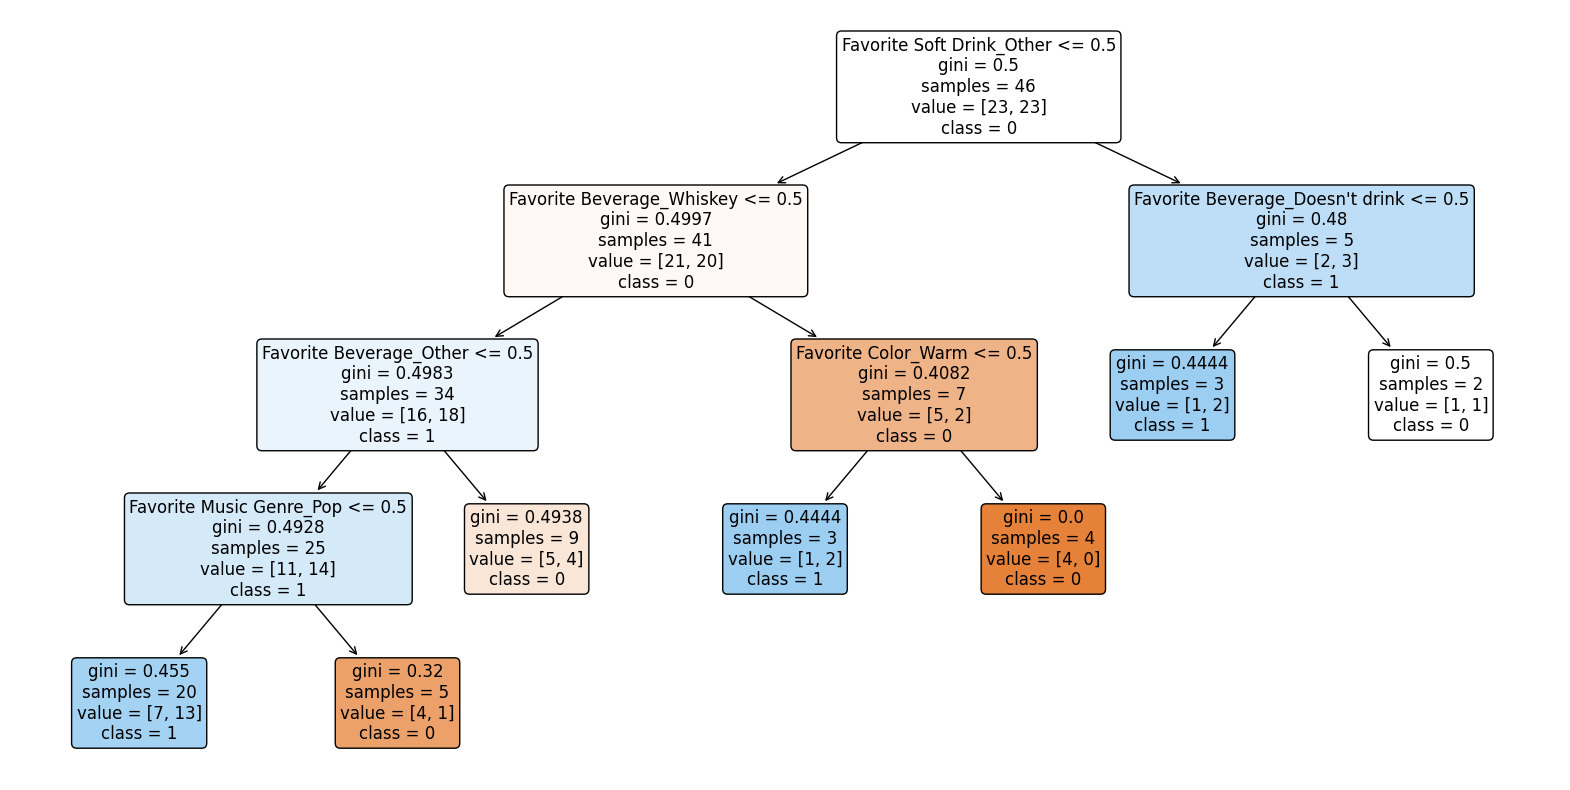

In [311]:
# Plotting the tree

plt.figure(figsize = (20, 10))

dtree = tree.plot_tree(fontsize = 12, decision_tree = model, feature_names = df.columns[:-1], class_names = ["0", "1"], filled = True , precision = 4, rounded = True)

### Saving the model

In [313]:
dump(model, "decision_tree_model.h5")

['decision_tree_model.h5']